In [16]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import leidenalg 

In [17]:
adata_sig=sc.read_h5ad('/Users/anuvindpramod/Desktop/code/Sc_RNA_seq /datasets/SCP1414_BC_4513.h5ad')
metadata_scp1414=pd.read_csv('/Users/anuvindpramod/Desktop/code/Sc_RNA_seq /datasets/SCP1415/metadata/Wu_etal_2021_metadata.txt',sep='\t')


/var/folders/1v/qxctrss577375j4k5wl9vjfc0000gn/T/ipykernel_15372/2896351365.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_scp1414=pd.read_csv('/Users/anuvindpramod/Desktop/code/Sc_RNA_seq /datasets/SCP1415/metadata/Wu_etal_2021_metadata.txt',sep='\t')


In [2]:
adata_sig=sc.read_h5ad('/Users/anuvindpramod/Desktop/code/Sc_RNA_seq /datasets/SCP1414_BC_4471.h5ad')
metadata_scp1414=pd.read_csv('/Users/anuvindpramod/Desktop/code/Sc_RNA_seq /datasets/SCP1415/metadata/Wu_etal_2021_metadata.txt',sep='\t')

/var/folders/1v/qxctrss577375j4k5wl9vjfc0000gn/T/ipykernel_15372/2809823975.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_scp1414=pd.read_csv('/Users/anuvindpramod/Desktop/code/Sc_RNA_seq /datasets/SCP1415/metadata/Wu_etal_2021_metadata.txt',sep='\t')


In [18]:
metadata_scp1414_breast_cancer=metadata_scp1414[metadata_scp1414['disease__ontology_label']=='breast cancer']
metadata_scp1414_breast_cancer_4513=metadata_scp1414_breast_cancer[metadata_scp1414_breast_cancer['donor_id']=='CID4513']
metadata_4513=metadata_scp1414_breast_cancer_4513

In [45]:
adata_ctr=sc.read_h5ad('/Users/anuvindpramod/Desktop/code/Sc_RNA_seq /datasets/SCP1731/Person wise/SCP1731_WT_A.h5ad')

In [19]:
adata_sig.var['mt']=adata_sig.var_names.str.startswith('MT-')


In [20]:
sc.pp.calculate_qc_metrics(adata_sig,inplace=True,log1p=False,qc_vars=['mt'])


In [21]:
adata_sig.obs

,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,pct_counts_mt
CID4513_AAACCTGAGCAGACTG,2252,6575.0,35.741445,44.456274,54.342205,68.790875,304.0,4.623574
CID4513_AAACCTGAGTCATGCT,1085,2208.0,32.653986,43.885870,56.068841,73.505435,80.0,3.623188
CID4513_AAACCTGCAACTGCGC,2340,7028.0,30.719977,42.416050,53.998293,68.525896,339.0,4.823563
CID4513_AAACCTGCAATCTGCA,641,1279.0,38.858483,51.837373,65.519937,88.975762,1.0,0.078186
CID4513_AAACCTGCACCGCTAG,224,346.0,47.109827,64.161850,93.063584,100.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...
CID4513CHUNKS_TTTGTCAGTTCGCTAA,890,1993.0,38.334170,50.928249,63.171099,80.431510,60.0,3.010537
CID4513CHUNKS_TTTGTCATCCCTAATT,1384,3061.0,31.819667,42.763803,54.328651,71.120549,101.0,3.299575
CID4513CHUNKS_TTTGTCATCGCGCCAA,2780,10791.0,35.900287,45.964229,57.205078,71.226022,448.0,4.151608
CID4513CHUNKS_TTTGTCATCGCGTTTC,365,536.0,36.380597,50.559701,69.216418,100.000000,36.0,6.716418


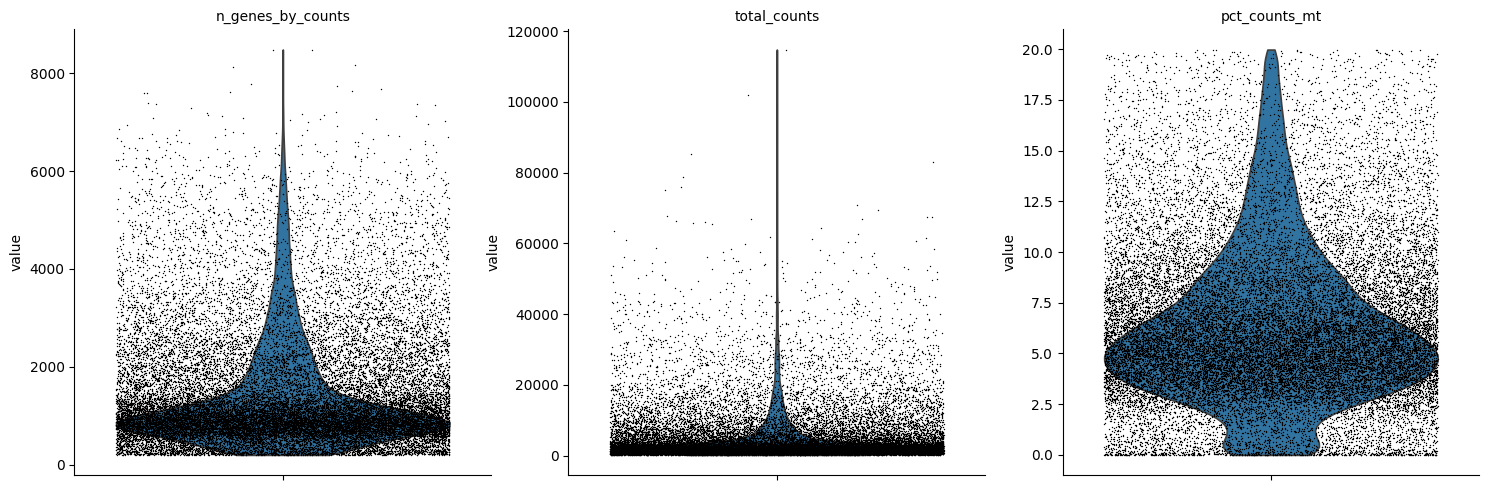

In [133]:
sc.pl.violin(adata_sig,['n_genes_by_counts','total_counts','pct_counts_mt'],jitter=0.4,multi_panel=True)

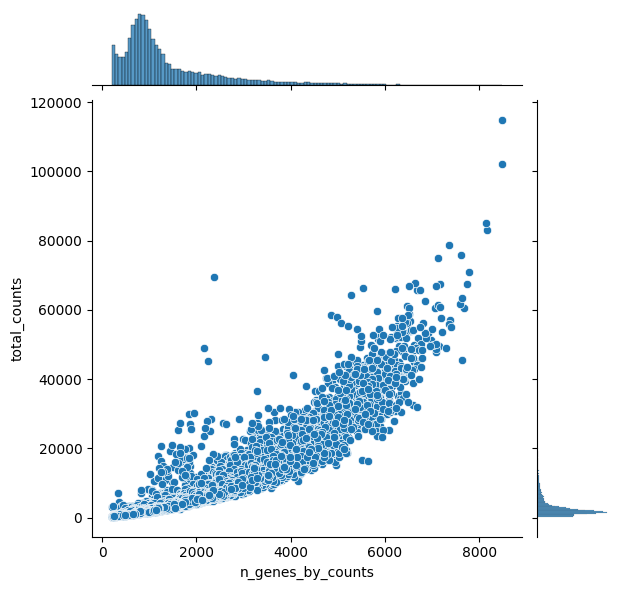

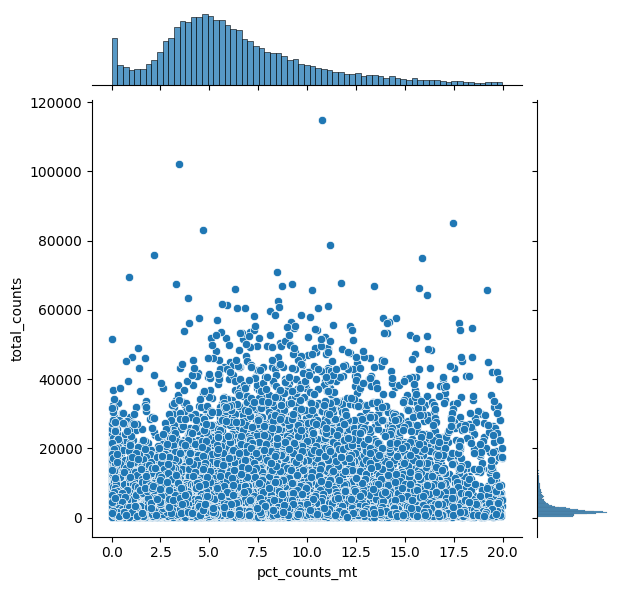

In [134]:
sns.jointplot(x='n_genes_by_counts',y='total_counts',data=adata_sig.obs,kind='scatter')
sns.jointplot(x='pct_counts_mt',y='total_counts',data=adata_sig.obs,kind='scatter')


In [7]:
#4471
bdata_sig=adata_sig.copy()
bdata_sig=bdata_sig[bdata_sig.obs['pct_counts_mt']<16.5]
bdata_sig=bdata_sig[bdata_sig.obs['total_counts']<55000]
bdata_sig=bdata_sig[bdata_sig.obs['n_genes_by_counts']<7300]

In [22]:
#4513
bdata_sig=adata_sig.copy()
bdata_sig=bdata_sig[bdata_sig.obs['pct_counts_mt']<16.5]
bdata_sig=bdata_sig[bdata_sig.obs['total_counts']<80000]
bdata_sig=bdata_sig[bdata_sig.obs['n_genes_by_counts']<7700]


In [24]:
#44971
bdata_sig=adata_sig.copy()
bdata_sig=bdata_sig[bdata_sig.obs['pct_counts_mt']<16.5]
bdata_sig=bdata_sig[bdata_sig.obs['total_counts']<60000]
bdata_sig=bdata_sig[bdata_sig.obs['n_genes_by_counts']<7000]

In [23]:
sc.pp.normalize_total(bdata_sig,target_sum=1e4,inplace=True)


/Users/anuvindpramod/Desktop/code/Sc_RNA_seq /sc_rna_3/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [24]:
sc.pp.log1p(bdata_sig)


In [121]:
sc.pp.highly_variable_genes(bdata_sig,flavor='seurat',n_top_genes=2000)


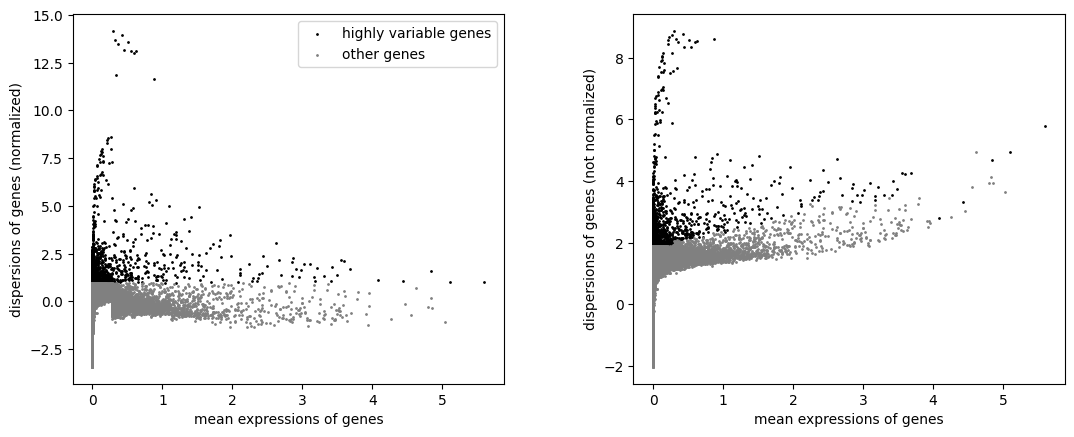

In [17]:
sc.pl.highly_variable_genes(bdata_sig)

In [18]:
sc.pp.pca(bdata_sig,svd_solver='arpack',mask_var="highly_variable")

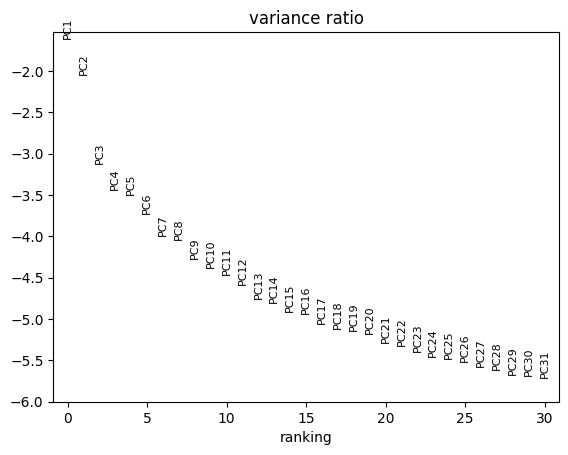

In [19]:
sc.pl.pca_variance_ratio(bdata_sig,log=True)

In [20]:
sc.pp.neighbors(bdata_sig,n_pcs=22)



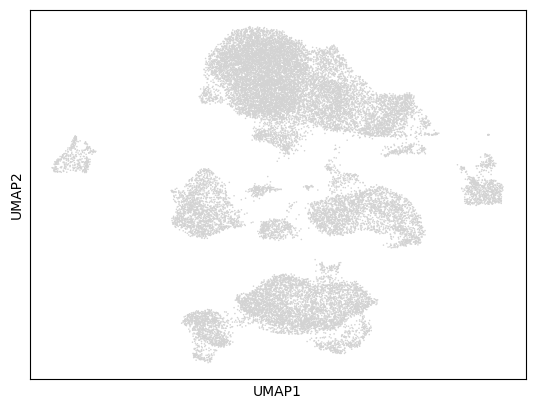

In [22]:
sc.tl.umap(bdata_sig,n_components=2)
sc.pl.umap(bdata_sig)

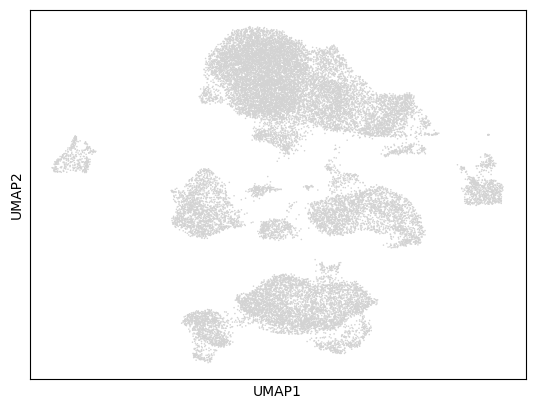

In [18]:
sc.pl.umap(bdata_sig)

In [25]:
yap1_exp_sig = bdata_sig[:, 'YAP1'].X.toarray().flatten()
wwtr1_exp_sig = bdata_sig[:, 'WWTR1'].X.toarray().flatten()

# expression groups
bdata_sig.obs['expression_group'] = 'Double_negative'
bdata_sig.obs.loc[(yap1_exp_sig > 0) & (wwtr1_exp_sig == 0), 'expression_group'] = 'YAP1_only'
bdata_sig.obs.loc[(yap1_exp_sig == 0) & (wwtr1_exp_sig > 0), 'expression_group'] = 'WWTR1_only'
bdata_sig.obs.loc[(yap1_exp_sig > 0) & (wwtr1_exp_sig > 0), 'expression_group'] = 'Double_positive'



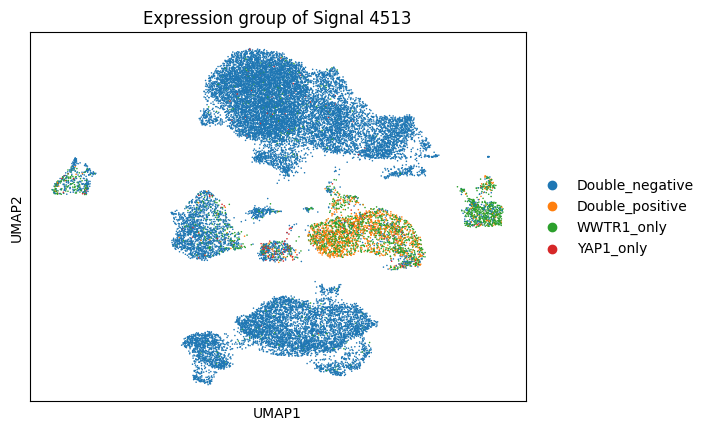

In [24]:
sc.pl.umap(bdata_sig,color='expression_group',title='Expression group of Signal 4513')

In [25]:
sc.tl.leiden(bdata_sig,resolution=0.6,key_added='leiden_clusters',n_iterations=-1,flavor='igraph')

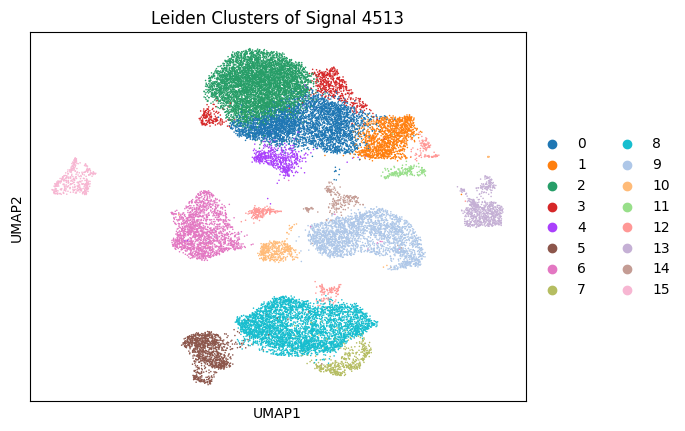

In [26]:
sc.pl.umap(bdata_sig,color='leiden_clusters',title='Leiden Clusters of Signal 4513')

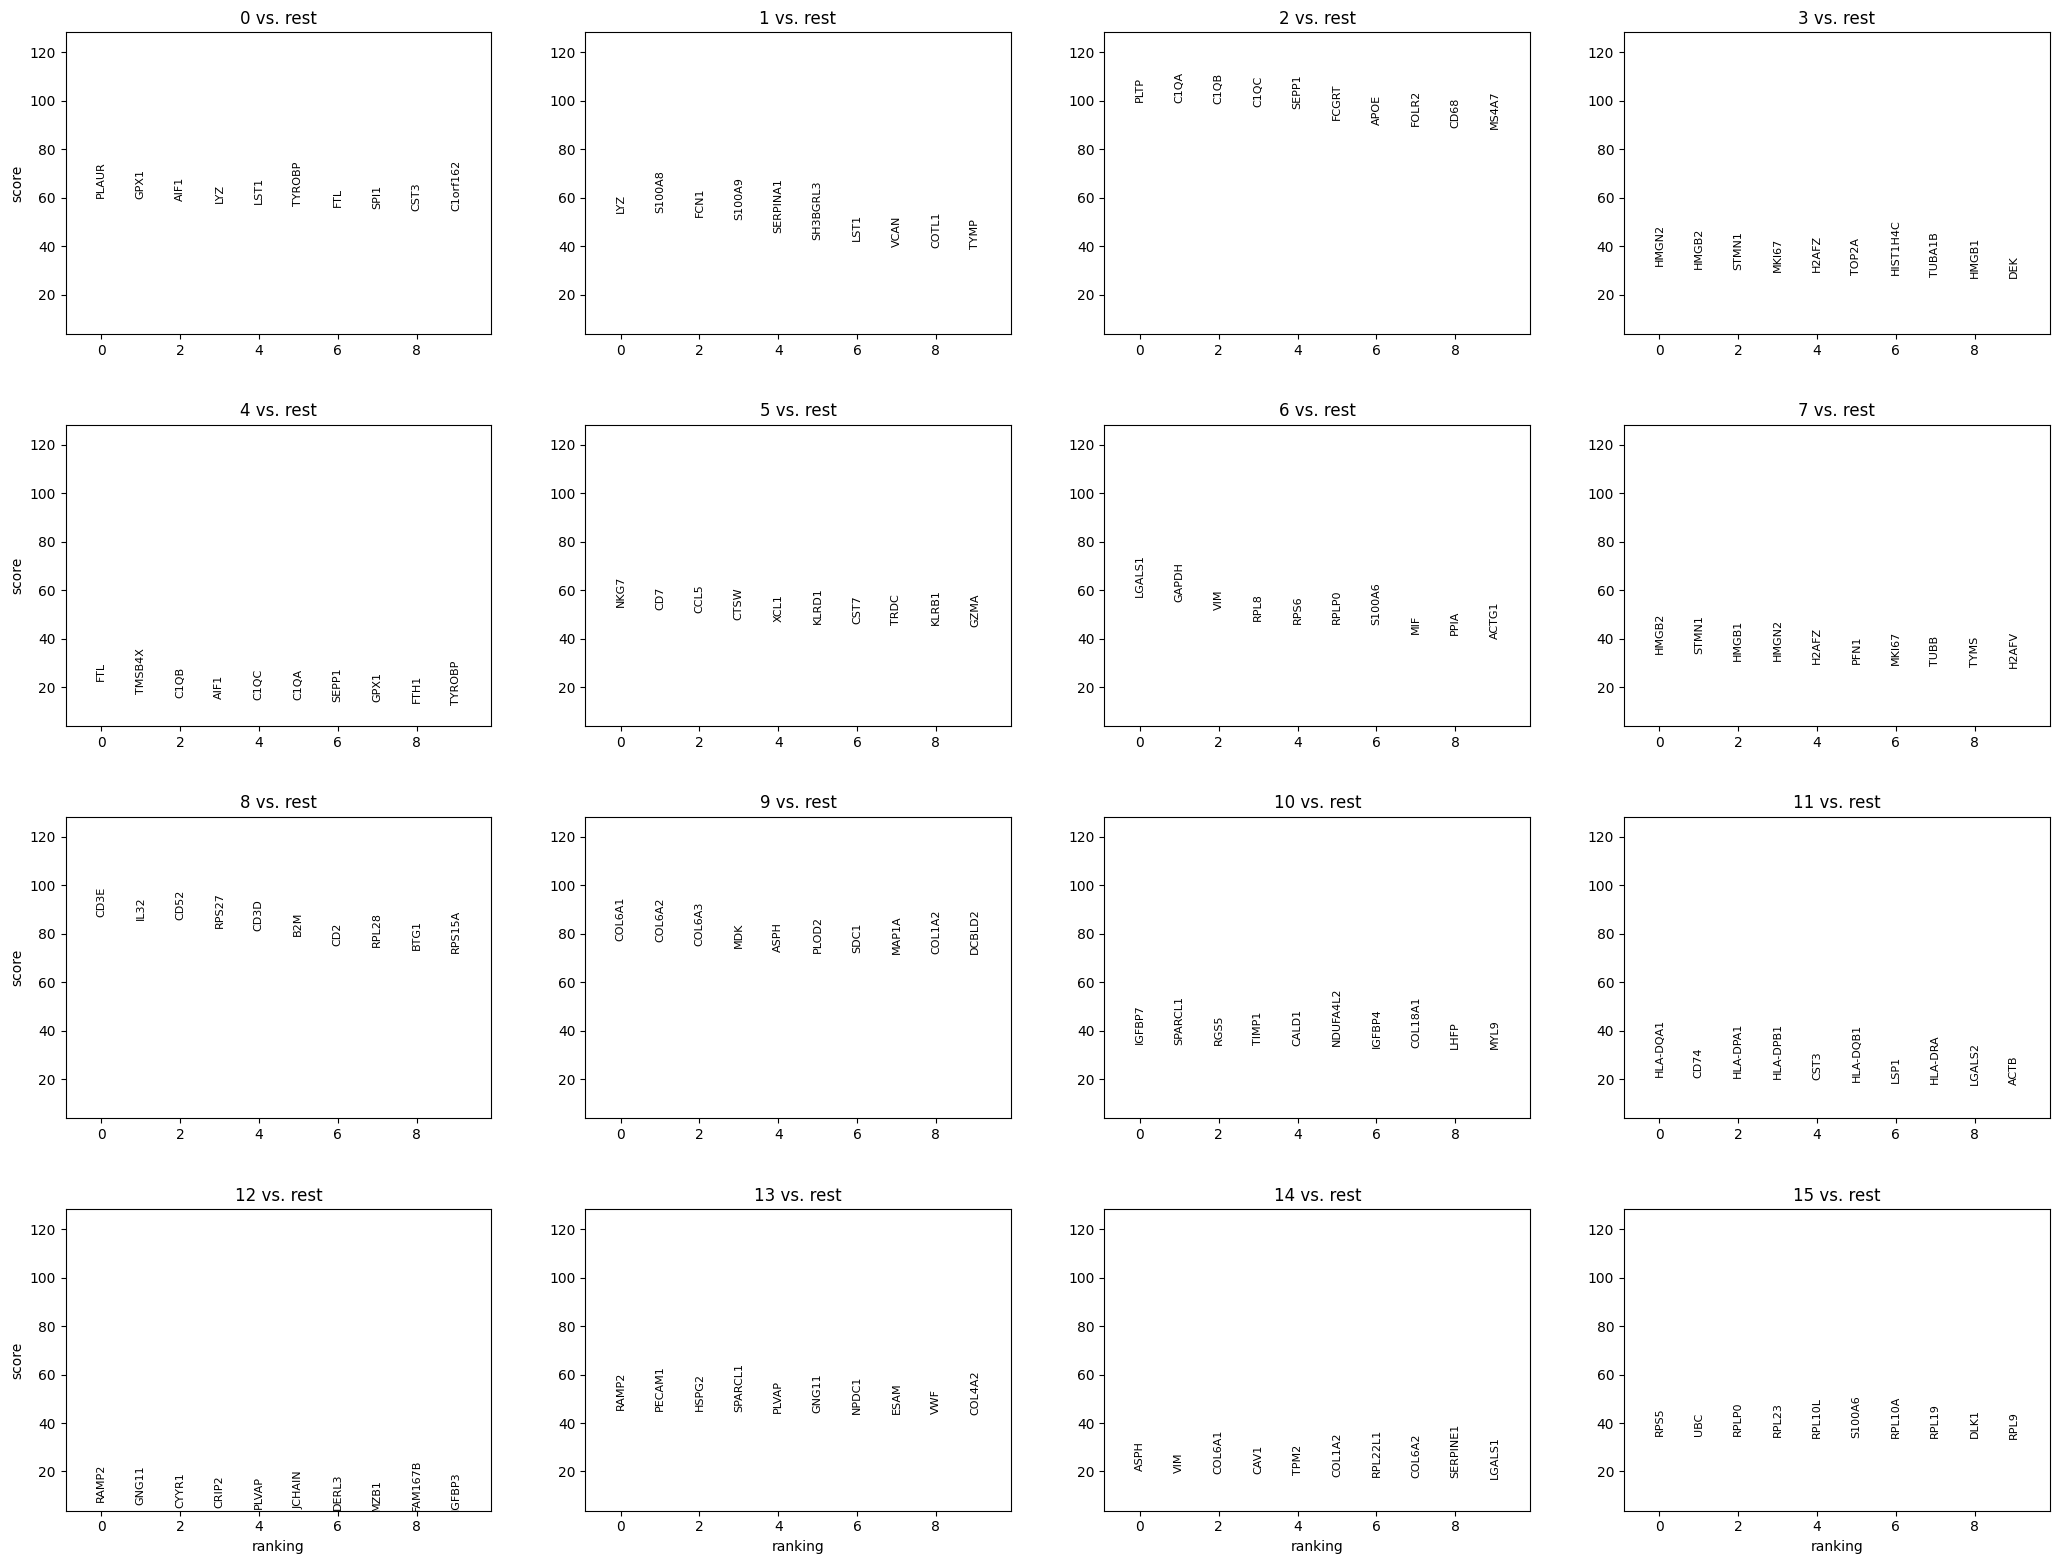

In [27]:
sc.tl.rank_genes_groups(bdata_sig,groupby='leiden_clusters',method='wilcoxon')
sc.pl.rank_genes_groups(bdata_sig,n_genes=10,title='Wilcoxon')


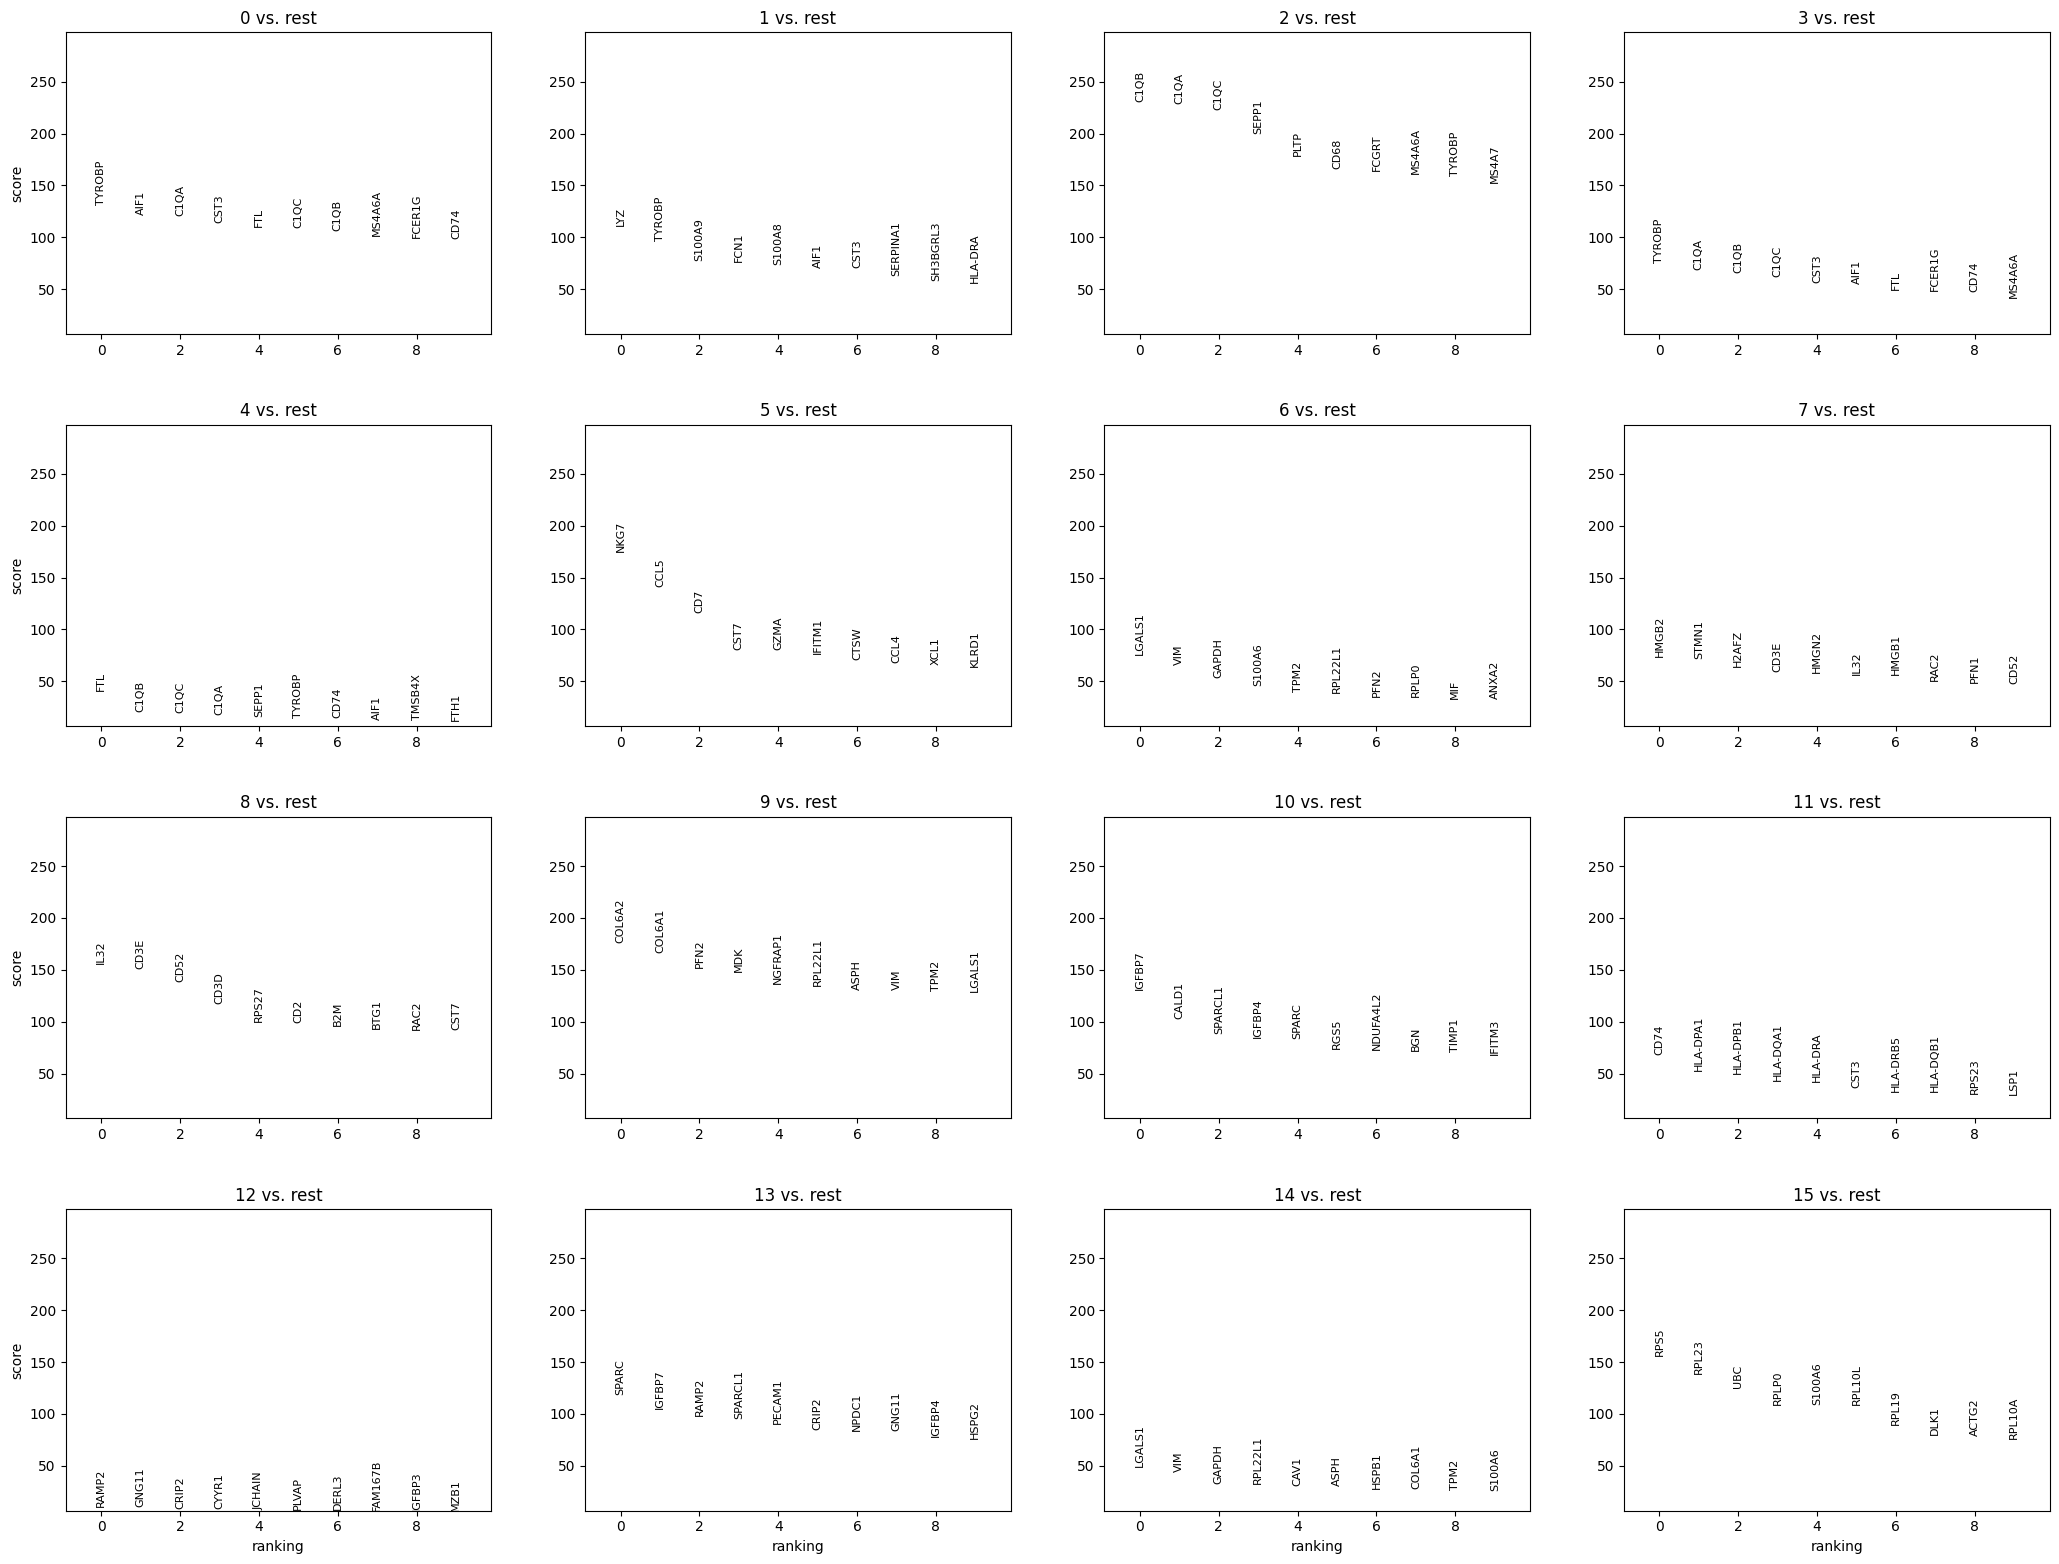

In [28]:
sc.tl.rank_genes_groups(bdata_sig,groupby='leiden_clusters',method='t-test')
sc.pl.rank_genes_groups(bdata_sig,n_genes=10,title='t-test')


In [29]:
result = bdata_sig.uns["rank_genes_groups"]
groups = result["names"].dtype.names
top_features = {}
n_top_genes = 10  # desired number of top genes per cluster
for group in groups:
    top_features[group] = result["names"][group][:n_top_genes]  

# Print the top features for each cluster
for group, features in top_features.items():
    print(f"Cluster {group} top features:")
    for feature in features:
        print(feature)
    print()

Cluster 0 top features:
TYROBP
AIF1
C1QA
CST3
FTL
C1QC
C1QB
MS4A6A
FCER1G
CD74

Cluster 1 top features:
LYZ
TYROBP
S100A9
FCN1
S100A8
AIF1
CST3
SERPINA1
SH3BGRL3
HLA-DRA

Cluster 2 top features:
C1QB
C1QA
C1QC
SEPP1
PLTP
CD68
FCGRT
MS4A6A
TYROBP
MS4A7

Cluster 3 top features:
TYROBP
C1QA
C1QB
C1QC
CST3
AIF1
FTL
FCER1G
CD74
MS4A6A

Cluster 4 top features:
FTL
C1QB
C1QC
C1QA
SEPP1
TYROBP
CD74
AIF1
TMSB4X
FTH1

Cluster 5 top features:
NKG7
CCL5
CD7
CST7
GZMA
IFITM1
CTSW
CCL4
XCL1
KLRD1

Cluster 6 top features:
LGALS1
VIM
GAPDH
S100A6
TPM2
RPL22L1
PFN2
RPLP0
MIF
ANXA2

Cluster 7 top features:
HMGB2
STMN1
H2AFZ
CD3E
HMGN2
IL32
HMGB1
RAC2
PFN1
CD52

Cluster 8 top features:
IL32
CD3E
CD52
CD3D
RPS27
CD2
B2M
BTG1
RAC2
CST7

Cluster 9 top features:
COL6A2
COL6A1
PFN2
MDK
NGFRAP1
RPL22L1
ASPH
VIM
TPM2
LGALS1

Cluster 10 top features:
IGFBP7
CALD1
SPARCL1
IGFBP4
SPARC
RGS5
NDUFA4L2
BGN
TIMP1
IFITM3

Cluster 11 top features:
CD74
HLA-DPA1
HLA-DPB1
HLA-DQA1
HLA-DRA
CST3
HLA-DRB5
HLA-DQB1
RPS23
LSP1

In [26]:
group_percentages = bdata_sig.obs['expression_group'].value_counts(normalize=True) * 100
print("\nPercentage of cells in each expression group in signal 4513:")
print(group_percentages)


Percentage of cells in each expression group in signal 4513:
expression_group
Double_negative    84.208120
WWTR1_only          9.608112
Double_positive     5.277812
YAP1_only           0.905955
Name: proportion, dtype: float64


In [157]:
bdata_sig.obs

,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,pct_counts_mt,expression_group
CID4513_AAACCTGAGCAGACTG,2252,6575.0,35.741445,44.456274,54.342205,68.790875,304.0,4.623574,Double_negative
CID4513_AAACCTGAGTCATGCT,1085,2208.0,32.653986,43.885870,56.068841,73.505435,80.0,3.623188,Double_negative
CID4513_AAACCTGCAACTGCGC,2340,7028.0,30.719977,42.416050,53.998293,68.525896,339.0,4.823563,Double_negative
CID4513_AAACCTGCAATCTGCA,641,1279.0,38.858483,51.837373,65.519937,88.975762,1.0,0.078186,Double_negative
CID4513_AAACCTGCACCGCTAG,224,346.0,47.109827,64.161850,93.063584,100.000000,0.0,0.000000,Double_negative
...,...,...,...,...,...,...,...,...,...
CID4513CHUNKS_TTTGTCAGTTCGCTAA,890,1993.0,38.334170,50.928249,63.171099,80.431510,60.0,3.010537,Double_negative
CID4513CHUNKS_TTTGTCATCCCTAATT,1384,3061.0,31.819667,42.763803,54.328651,71.120549,101.0,3.299575,Double_negative
CID4513CHUNKS_TTTGTCATCGCGCCAA,2780,10791.0,35.900287,45.964229,57.205078,71.226022,448.0,4.151608,Double_negative
CID4513CHUNKS_TTTGTCATCGCGTTTC,365,536.0,36.380597,50.559701,69.216418,100.000000,36.0,6.716418,Double_negative


In [16]:
metadata_4513


,NAME,biosample_id,donor_id,species,species__ontology_label,disease,disease__ontology_label,organ,organ__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label,sex,Condition,CellType,ClusterID
53632,CID4513_AAACCTGAGCAGACTG,BC-P3,CID4513,NCBITaxon_9606,Homo sapiens,MONDO_0007254,breast cancer,UBERON_0000310,breast,EFO_0009900,10x 5' v2,female,Fresh Tissue,Monocytes/Macrophages Cycling,9
53633,CID4513_AAACCTGAGTCATGCT,BC-P3,CID4513,NCBITaxon_9606,Homo sapiens,MONDO_0007254,breast cancer,UBERON_0000310,breast,EFO_0009900,10x 5' v2,female,Fresh Tissue,T-cells,8
53634,CID4513_AAACCTGCAACTGCGC,BC-P3,CID4513,NCBITaxon_9606,Homo sapiens,MONDO_0007254,breast cancer,UBERON_0000310,breast,EFO_0009900,10x 5' v2,female,Fresh Tissue,Monocytes/Macrophages Cycling,9
53635,CID4513_AAACCTGCAATCTGCA,BC-P3,CID4513,NCBITaxon_9606,Homo sapiens,MONDO_0007254,breast cancer,UBERON_0000310,breast,EFO_0009900,10x 5' v2,female,Fresh Tissue,Cancer/Epithelial,4
53636,CID4513_AAACCTGCACCGCTAG,BC-P3,CID4513,NCBITaxon_9606,Homo sapiens,MONDO_0007254,breast cancer,UBERON_0000310,breast,EFO_0009900,10x 5' v2,female,Fresh Tissue,Monocytes/Macrophages,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77877,CID4513CHUNKS_TTTGTCAGTTCGCTAA,BC-P3,CID4513,NCBITaxon_9606,Homo sapiens,MONDO_0007254,breast cancer,UBERON_0000310,breast,EFO_0009900,10x 5' v2,female,Cryopreserved Tissue,T-cells,6
77878,CID4513CHUNKS_TTTGTCATCCCTAATT,BC-P3,CID4513,NCBITaxon_9606,Homo sapiens,MONDO_0007254,breast cancer,UBERON_0000310,breast,EFO_0009900,10x 5' v2,female,Cryopreserved Tissue,T-cells,3
77879,CID4513CHUNKS_TTTGTCATCGCGCCAA,BC-P3,CID4513,NCBITaxon_9606,Homo sapiens,MONDO_0007254,breast cancer,UBERON_0000310,breast,EFO_0009900,10x 5' v2,female,Cryopreserved Tissue,Monocytes/Macrophages,0
77880,CID4513CHUNKS_TTTGTCATCGCGTTTC,BC-P3,CID4513,NCBITaxon_9606,Homo sapiens,MONDO_0007254,breast cancer,UBERON_0000310,breast,EFO_0009900,10x 5' v2,female,Cryopreserved Tissue,Monocytes/Macrophages,7


In [185]:
bdata_sig.obs

,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,pct_counts_mt,expression_group
CID44971_AAACCTGAGCATCATC,1031,2710.0,38.044280,53.505535,65.498155,80.405904,172.0,6.346864,Double_negative
CID44971_AAACCTGAGGTTCCTA,1241,3927.0,47.975554,60.300484,69.849758,81.130634,150.0,3.819710,Double_negative
CID44971_AAACCTGAGTTGTCGT,557,881.0,34.279228,46.538025,59.477866,93.530079,55.0,6.242906,Double_negative
CID44971_AAACCTGTCGCTTAGA,898,2053.0,38.188018,51.242085,63.662932,80.613736,125.0,6.088651,Double_negative
CID44971_AAACGGGGTACGACCC,402,613.0,36.541599,50.734095,67.047308,100.000000,34.0,5.546493,Double_negative
...,...,...,...,...,...,...,...,...,...
CID44971CHUNKS_TTGTAGGTCTACGAGT,701,1052.0,27.851711,38.688213,52.376426,80.893536,64.0,6.083650,Double_negative
CID44971CHUNKS_TTTACTGGTAGATTAG,696,1101.0,32.515895,43.051771,54.950045,82.198002,105.0,9.536785,Double_negative
CID44971CHUNKS_TTTATGCGTGTCGCTG,1703,3990.0,29.147870,40.651629,52.080201,69.273183,143.0,3.583960,WWTR1_only
CID44971CHUNKS_TTTCCTCGTTACTGAC,646,980.0,32.653061,43.061224,54.489796,85.102041,64.0,6.530612,Double_negative


In [27]:
# Get the cell type mapmping from metadata
cell_type_dict = metadata_4513.set_index('NAME')['CellType'].to_dict()

# Add cell type information to bdata_sig.obs
bdata_sig.obs['cell_type'] = bdata_sig.obs.index.map(cell_type_dict)

# Verify the mapping
print("Number of cells with assigned cell types:", bdata_sig.obs['cell_type'].notna().sum())
print("\nCell type distribution:")
print(bdata_sig.obs['cell_type'].value_counts())



Number of cells with assigned cell types: 24063

Cell type distribution:
cell_type
Monocytes/Macrophages            11384
T-cells                           4765
Cancer/Epithelial                 4016
Monocytes/Macrophages Cycling      927
Endothelial                        740
T-cells Cycling                    724
PVL cells                          493
Mouse 3T3 spike-in                 409
CAFs                               234
Unassigned                         197
cDCs                               124
Plasmablasts                        50
Name: count, dtype: int64


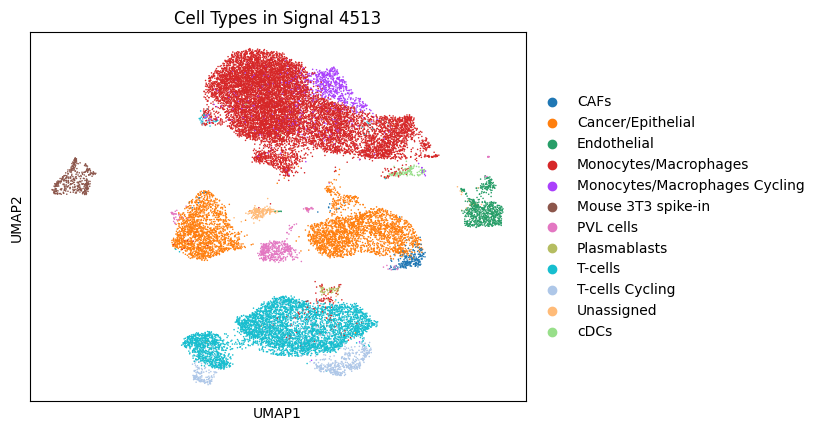

In [32]:
# Visualize the cell types on UMAP
sc.pl.umap(bdata_sig, color='cell_type', title='Cell Types in Signal 4513')

In [29]:
bdata_sig.obs

,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,pct_counts_mt,expression_group,cell_type
CID4513_AAACCTGAGCAGACTG,2252,6575.0,35.741445,44.456274,54.342205,68.790875,304.0,4.623574,Double_negative,Monocytes/Macrophages Cycling
CID4513_AAACCTGAGTCATGCT,1085,2208.0,32.653986,43.885870,56.068841,73.505435,80.0,3.623188,Double_negative,T-cells
CID4513_AAACCTGCAACTGCGC,2340,7028.0,30.719977,42.416050,53.998293,68.525896,339.0,4.823563,Double_negative,Monocytes/Macrophages Cycling
CID4513_AAACCTGCAATCTGCA,641,1279.0,38.858483,51.837373,65.519937,88.975762,1.0,0.078186,Double_negative,Cancer/Epithelial
CID4513_AAACCTGCACCGCTAG,224,346.0,47.109827,64.161850,93.063584,100.000000,0.0,0.000000,Double_negative,Monocytes/Macrophages
...,...,...,...,...,...,...,...,...,...,...
CID4513CHUNKS_TTTGTCAGTTCGCTAA,890,1993.0,38.334170,50.928249,63.171099,80.431510,60.0,3.010537,Double_negative,T-cells
CID4513CHUNKS_TTTGTCATCCCTAATT,1384,3061.0,31.819667,42.763803,54.328651,71.120549,101.0,3.299575,Double_negative,T-cells
CID4513CHUNKS_TTTGTCATCGCGCCAA,2780,10791.0,35.900287,45.964229,57.205078,71.226022,448.0,4.151608,Double_negative,Monocytes/Macrophages
CID4513CHUNKS_TTTGTCATCGCGTTTC,365,536.0,36.380597,50.559701,69.216418,100.000000,36.0,6.716418,Double_negative,Monocytes/Macrophages


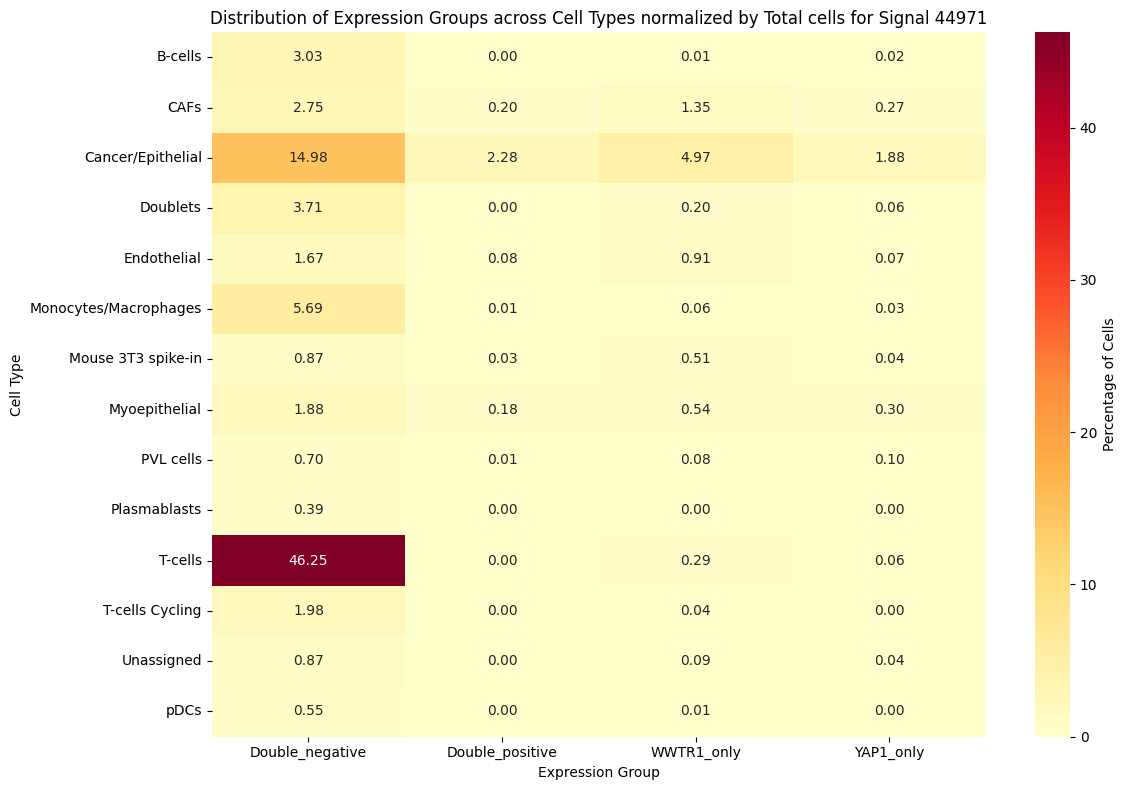

In [15]:
cross_tab = pd.crosstab(bdata_sig.obs['cell_type'], 
                        bdata_sig.obs['expression_group'], 
)
cross_tab = (cross_tab / 29048) * 100
# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, 
            annot=True,  # Show percentage values
            fmt='.2f',   # Format to 1 decimal place
            cmap='YlOrRd',
            cbar_kws={'label': 'Percentage of Cells'})

plt.title('Distribution of Expression Groups across Cell Types normalized by Total cells for Signal 44971')
plt.xlabel('Expression Group')
plt.ylabel('Cell Type')
plt.tight_layout()
plt.show()

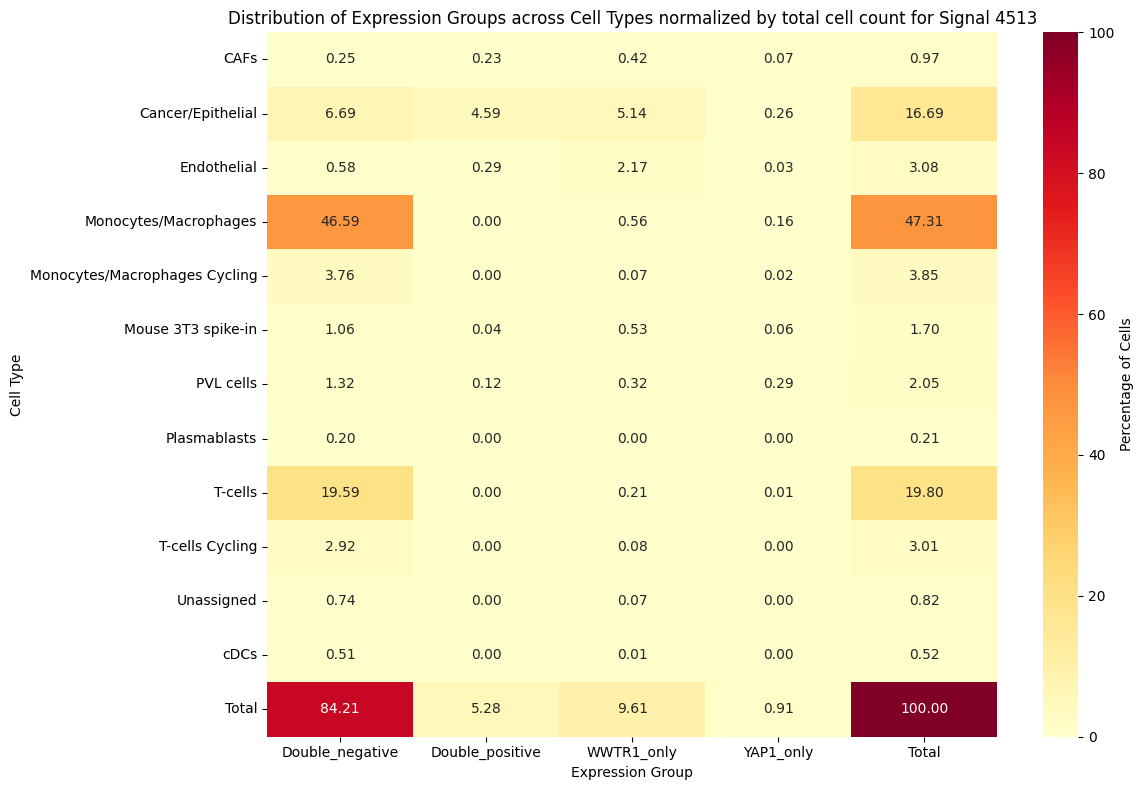

In [30]:
cross_tab = pd.crosstab(bdata_sig.obs['cell_type'], 
                        bdata_sig.obs['expression_group'])

# Calculate totals for rows and columns
cross_tab['Total'] = cross_tab.sum(axis=1)
cross_tab.loc['Total'] = cross_tab.sum()

# Normalize the data (excluding the totals)
cross_tab_normalized = (cross_tab / 24063) * 100

# Create a mask to prevent coloring the totals
mask = cross_tab_normalized.isna()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab_normalized, 
            annot=True,  # Show percentage values
            fmt='.2f',   # Format to 1 decimal place
            cmap='YlOrRd',
            cbar_kws={'label': 'Percentage of Cells'},
            mask=mask)

plt.title('Distribution of Expression Groups across Cell Types normalized by total cell count for Signal 4513')
plt.xlabel('Expression Group')
plt.ylabel('Cell Type')
plt.tight_layout()
plt.show()

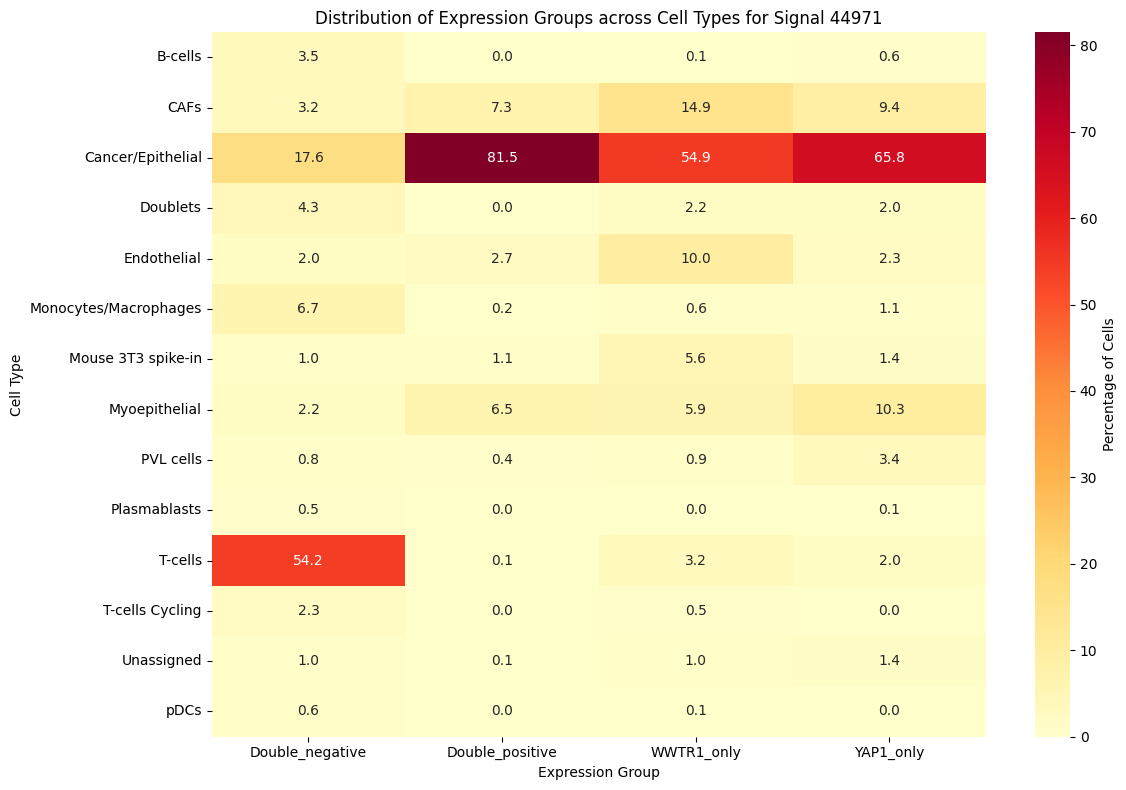

In [57]:
cross_tab = pd.crosstab(bdata_sig.obs['cell_type'], 
                        bdata_sig.obs['expression_group'], 
                        normalize='columns') * 100

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, 
            annot=True,  # Show percentage values
            fmt='.1f',   # Format to 1 decimal place
            cmap='YlOrRd',
            cbar_kws={'label': 'Percentage of Cells'})

plt.title('Distribution of Expression Groups across Cell Types for Signal 44971')
plt.xlabel('Expression Group')
plt.ylabel('Cell Type')
plt.tight_layout()
plt.show()

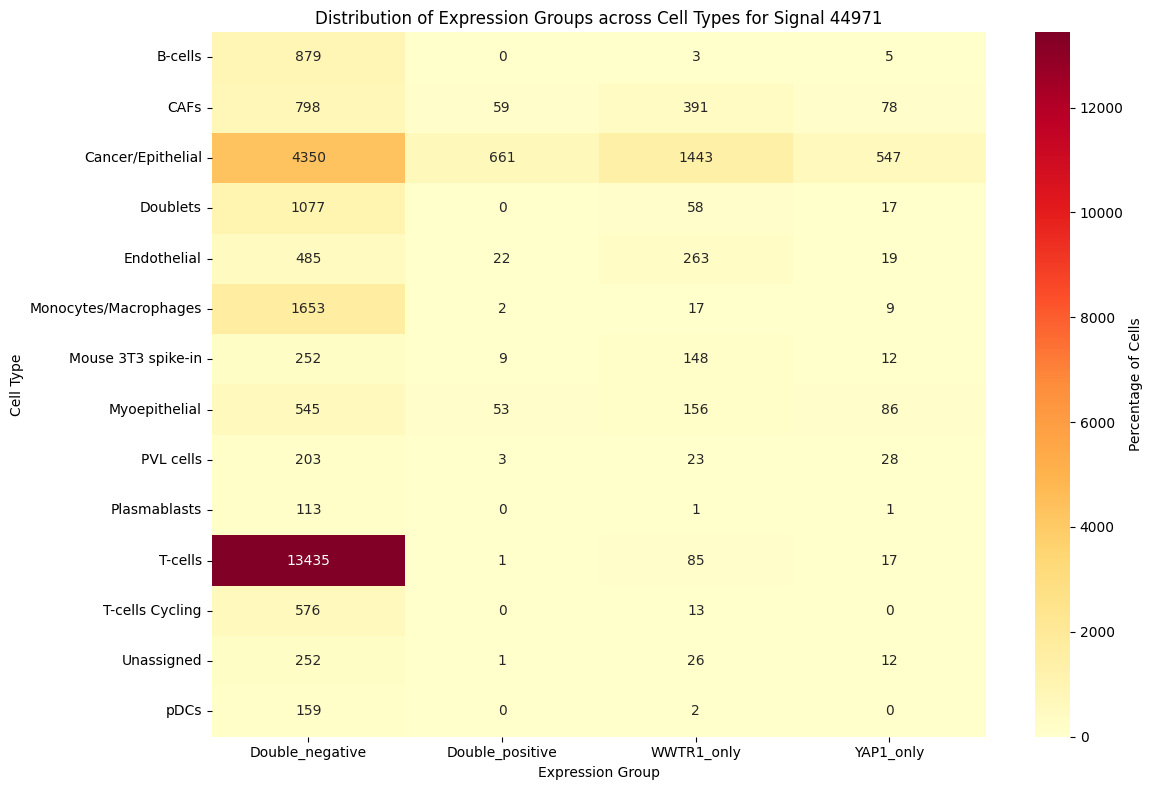

In [62]:
cross_tab = pd.crosstab(bdata_sig.obs['cell_type'], 
                        bdata_sig.obs['expression_group'], 
                        ) 

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, 
            annot=True,  # Show percentage values
            fmt='g',   # Format to 1 decimal place
            cmap='YlOrRd',
            cbar_kws={'label': 'Percentage of Cells'})

plt.title('Distribution of Expression Groups across Cell Types for Signal 44971')
plt.xlabel('Expression Group')
plt.ylabel('Cell Type')
plt.tight_layout()
plt.show()

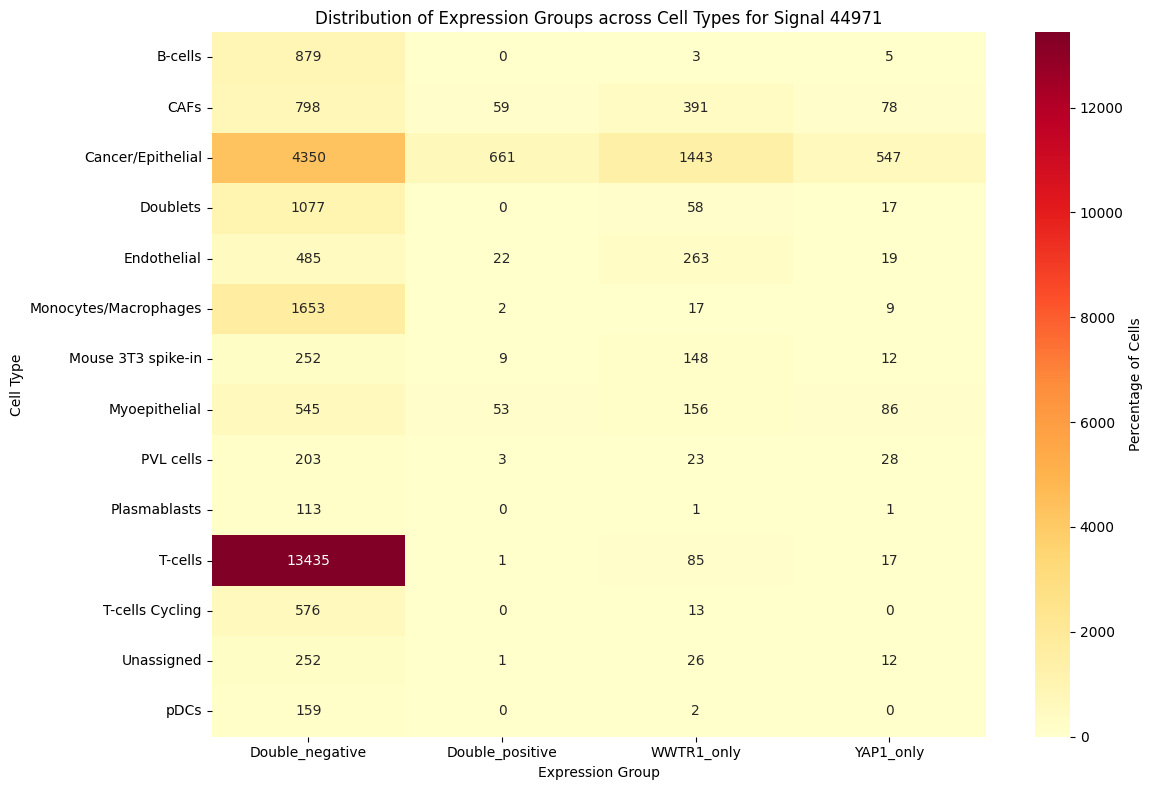

In [92]:
cross_tab = pd.crosstab(bdata_sig.obs['cell_type'], 
                        bdata_sig.obs['expression_group'])

# Save the crosstab to an Excel file
cross_tab.to_excel('/Users/anuvindpramod/Desktop/Final results/excel_3.xlsx', sheet_name='44971')

# Optionally, you can still create the heatmap if needed
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, 
            annot=True,  # Show percentage values
            fmt='g',   # Format to 1 decimal place
            cmap='YlOrRd',
            cbar_kws={'label': 'Percentage of Cells'})

plt.title('Distribution of Expression Groups across Cell Types for Signal 44971')
plt.xlabel('Expression Group')
plt.ylabel('Cell Type')
plt.tight_layout()
plt.show()

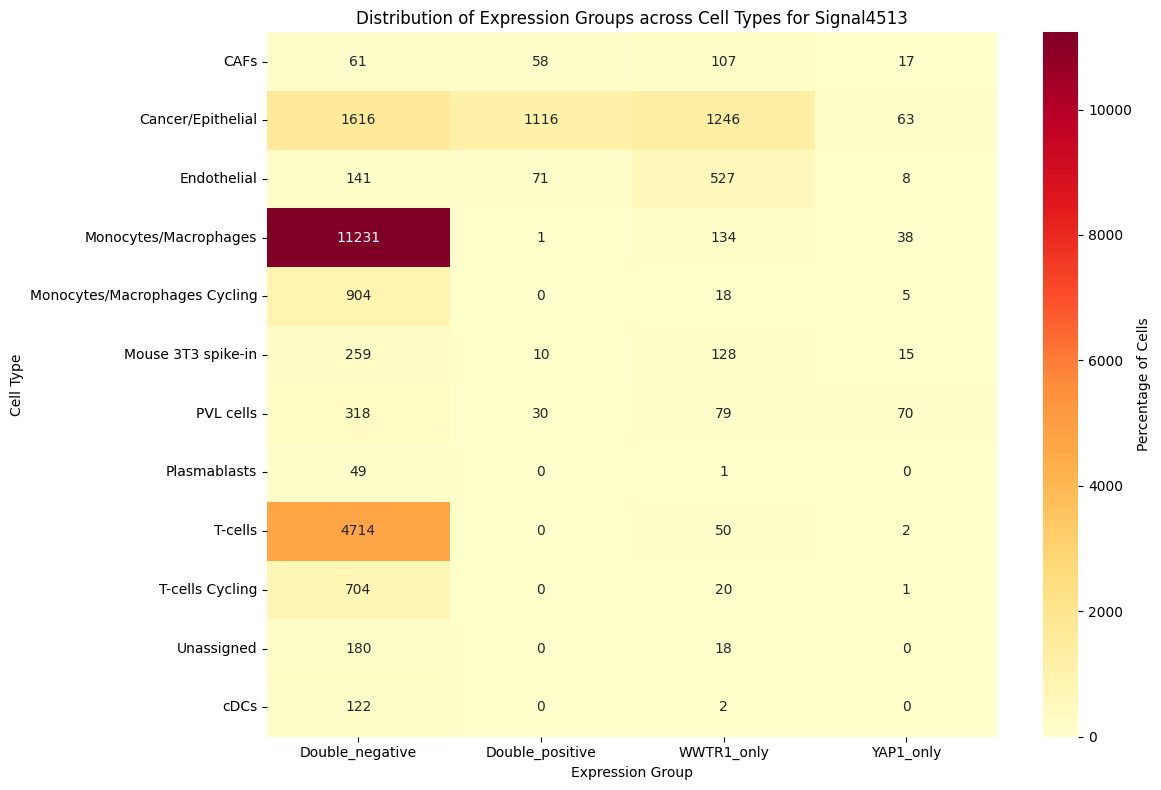

In [47]:
cross_tab = pd.crosstab(bdata_sig.obs['cell_type'], 
                        bdata_sig.obs['expression_group']
                        )

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, 
            annot=True,  # Show percentage values
            fmt='g',   # Format to 1 decimal place
            cmap='YlOrRd',
            cbar_kws={'label': 'Percentage of Cells'})

plt.title('Distribution of Expression Groups across Cell Types for Signal4513')
plt.xlabel('Expression Group')
plt.ylabel('Cell Type')
plt.tight_layout()
plt.show()

In [49]:
import celltypist as ct
predictions=ct.annotate(bdata_sig,model='Cells_Adult_Breast.pkl')
bdata_sig.obs['cell_type_pred_ct']=predictions.predicted_labels


🔬 Input data has 24134 cells and 29927 genes
🔗 Matching reference genes in the model
🧬 3840 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


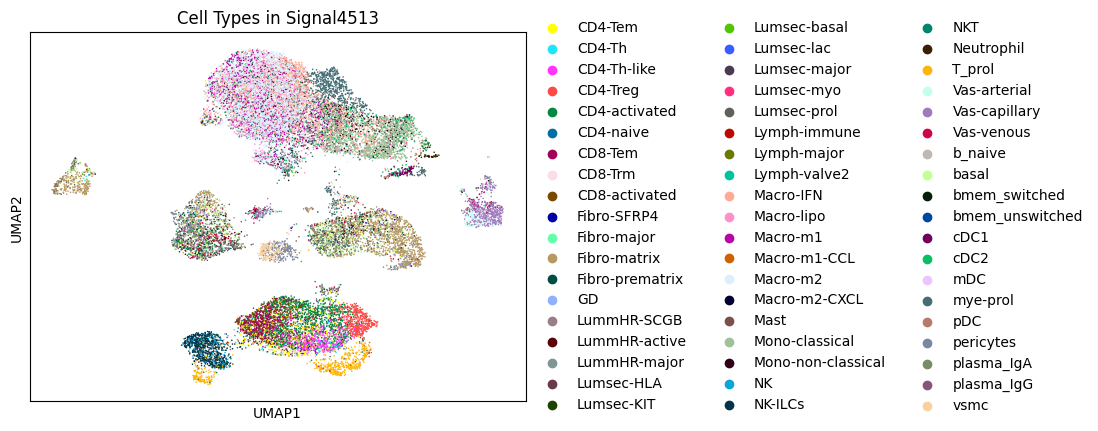

In [50]:
sc.pl.umap(bdata_sig,color='cell_type_pred_ct',title='Cell Types in Signal4513')

In [51]:
bdata_sig.obs

,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,pct_counts_mt,expression_group,leiden_clusters,cell_type,cell_type_pred_ct
CID4513_AAACCTGAGCAGACTG,2252,6575.0,35.741445,44.456274,54.342205,68.790875,304.0,4.623574,Double_negative,0,Monocytes/Macrophages Cycling,Macro-IFN
CID4513_AAACCTGAGTCATGCT,1085,2208.0,32.653986,43.885870,56.068841,73.505435,80.0,3.623188,Double_negative,5,T-cells,NK
CID4513_AAACCTGCAACTGCGC,2340,7028.0,30.719977,42.416050,53.998293,68.525896,339.0,4.823563,Double_negative,0,Monocytes/Macrophages Cycling,Mono-classical
CID4513_AAACCTGCAATCTGCA,641,1279.0,38.858483,51.837373,65.519937,88.975762,1.0,0.078186,Double_negative,6,Cancer/Epithelial,Fibro-matrix
CID4513_AAACCTGCACCGCTAG,224,346.0,47.109827,64.161850,93.063584,100.000000,0.0,0.000000,Double_negative,4,Monocytes/Macrophages,CD4-activated
...,...,...,...,...,...,...,...,...,...,...,...,...
CID4513CHUNKS_TTTGTCAGTTCGCTAA,890,1993.0,38.334170,50.928249,63.171099,80.431510,60.0,3.010537,Double_negative,8,T-cells,CD4-activated
CID4513CHUNKS_TTTGTCATCCCTAATT,1384,3061.0,31.819667,42.763803,54.328651,71.120549,101.0,3.299575,Double_negative,8,T-cells,T_prol
CID4513CHUNKS_TTTGTCATCGCGCCAA,2780,10791.0,35.900287,45.964229,57.205078,71.226022,448.0,4.151608,Double_negative,2,Monocytes/Macrophages,Macro-m2
CID4513CHUNKS_TTTGTCATCGCGTTTC,365,536.0,36.380597,50.559701,69.216418,100.000000,36.0,6.716418,Double_negative,12,Monocytes/Macrophages,Mono-classical


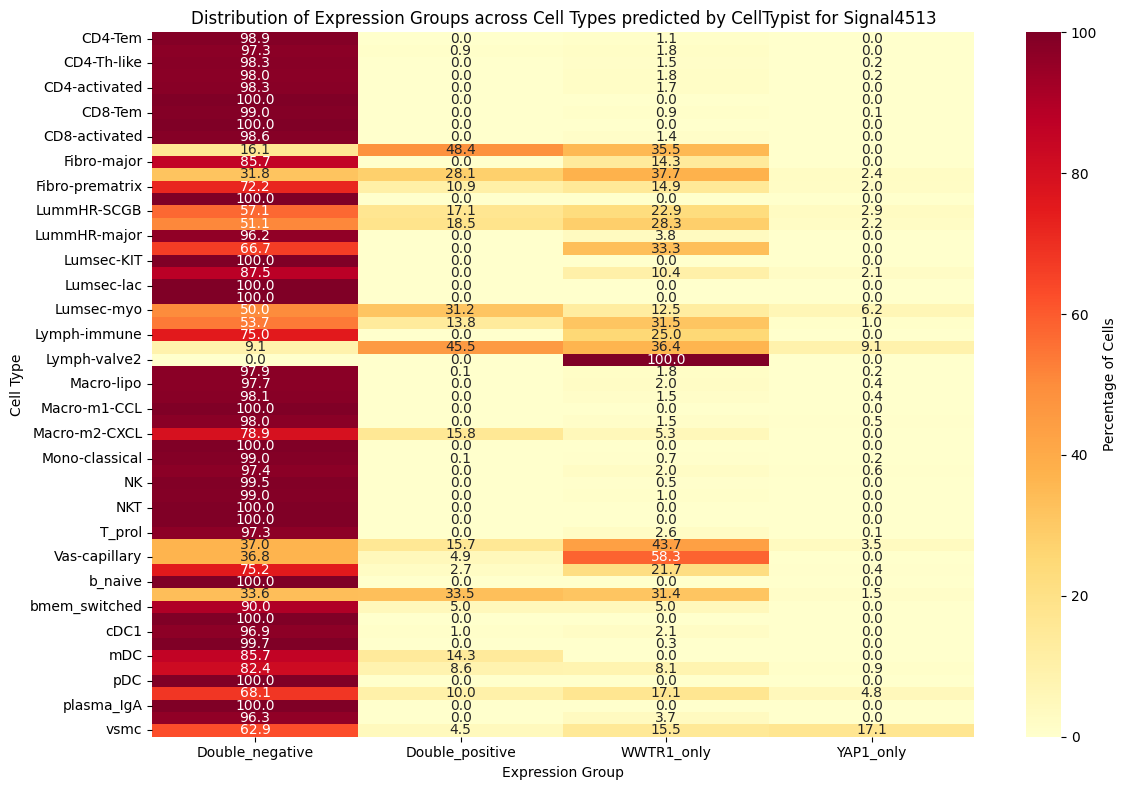

In [53]:
cross_tab = pd.crosstab(bdata_sig.obs['cell_type_pred_ct'], 
                        bdata_sig.obs['expression_group'],
                        normalize='index') * 100

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, 
            annot=True,  # Show percentage values
            fmt='.1f',   # Format to 1 decimal place
            cmap='YlOrRd',
            cbar_kws={'label': 'Percentage of Cells'})

plt.title('Distribution of Expression Groups across Cell Types predicted by CellTypist for Signal4513')
plt.xlabel('Expression Group')
plt.ylabel('Cell Type')
plt.tight_layout()
plt.show()

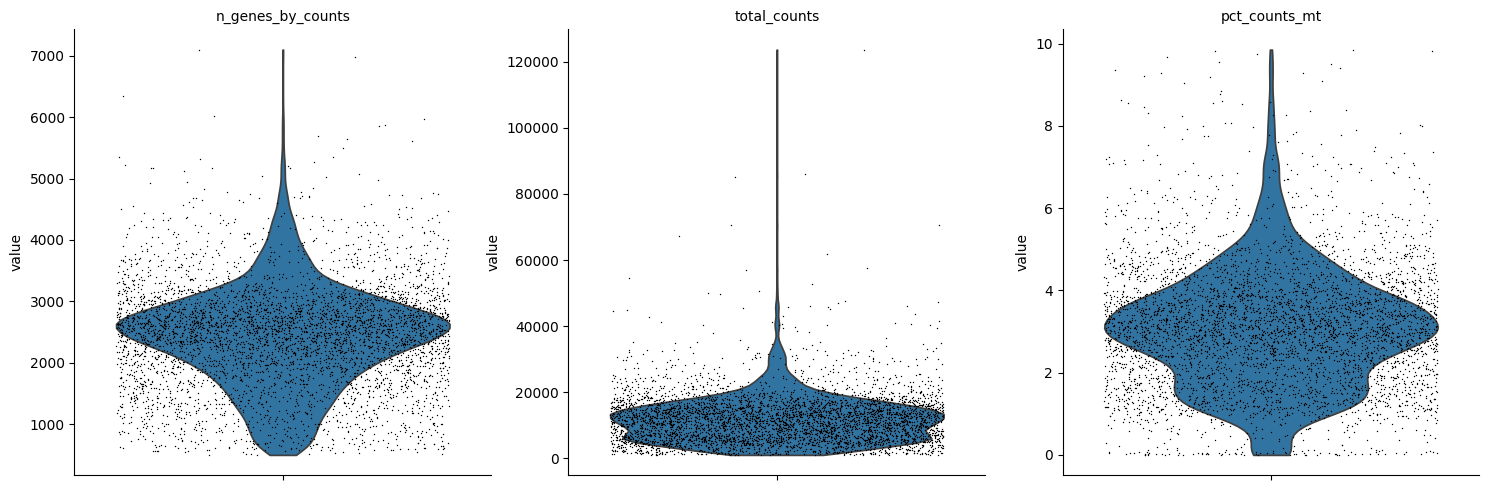

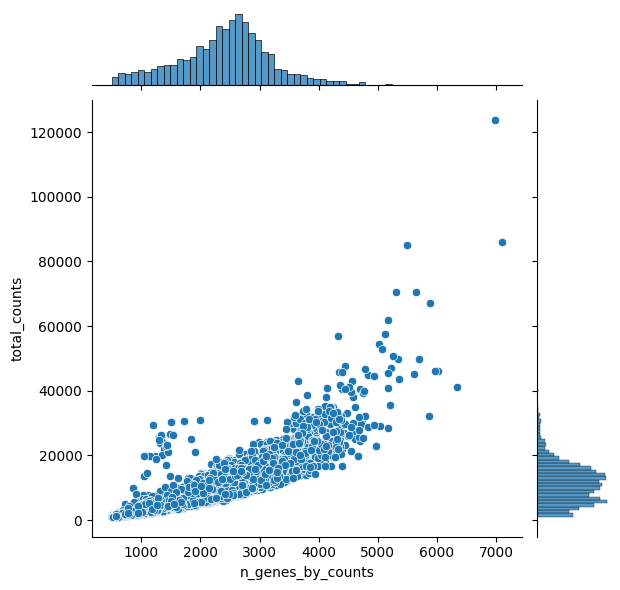

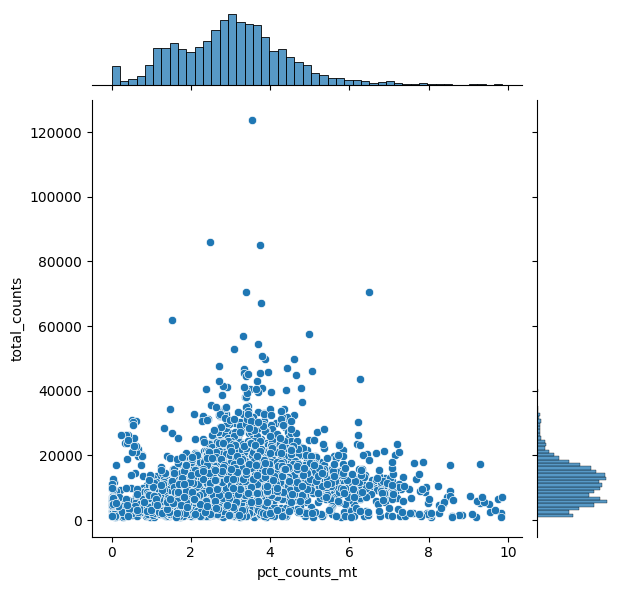

In [91]:
adata_sig_2=sc.read_h5ad('/Users/anuvindpramod/Desktop/code/Sc_RNA_seq /datasets/SCP1731/Person wise/SCP1731_WT_B.h5ad')
adata_sig_2.var['mt']=adata_sig_2.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_sig_2,inplace=True,log1p=False,qc_vars=['mt'])
sc.pl.violin(adata_sig_2,['n_genes_by_counts','total_counts','pct_counts_mt'],jitter=0.4,multi_panel=True)
sns.jointplot(x='n_genes_by_counts',y='total_counts',data=adata_sig_2.obs,kind='scatter')
sns.jointplot(x='pct_counts_mt',y='total_counts',data=adata_sig_2.obs,kind='scatter')

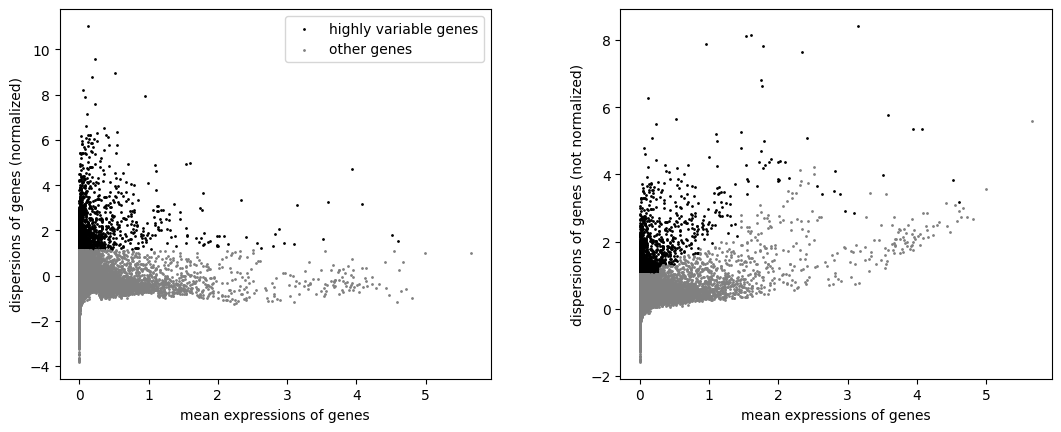

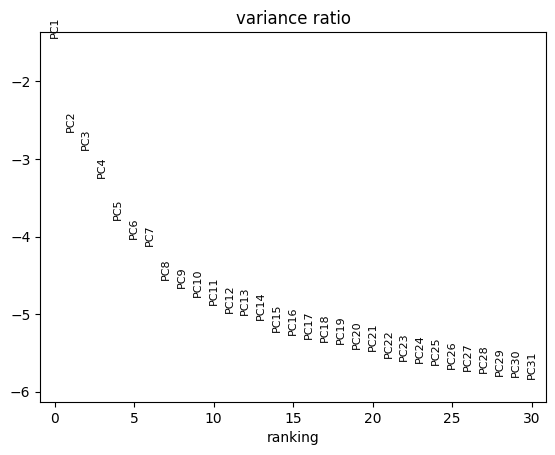

In [92]:
bdata_sig_2 = adata_sig_2.copy()
bdata_sig_2 = bdata_sig_2[bdata_sig_2.obs['pct_counts_mt'] < 9]
bdata_sig_2 = bdata_sig_2[bdata_sig_2.obs['total_counts'] < 60000]
bdata_sig_2 = bdata_sig_2[bdata_sig_2.obs['n_genes_by_counts'] < 5600]
sc.pp.normalize_total(bdata_sig_2,target_sum=1e4,inplace=True)
sc.pp.log1p(bdata_sig_2)
sc.pp.highly_variable_genes(bdata_sig_2,flavor='seurat',n_top_genes=2000)
sc.pl.highly_variable_genes(bdata_sig_2)
sc.pp.pca(bdata_sig_2,svd_solver='arpack',mask_var="highly_variable")
sc.pl.pca_variance_ratio(bdata_sig_2,log=True)


In [90]:
yap1_exp_sig = bdata_sig_2[:, 'YAP1'].X.toarray().flatten()
wwtr1_exp_sig = bdata_sig_2[:, 'WWTR1'].X.toarray().flatten()

bdata_sig_2.obs['expression_group'] = 'Double_negative'
bdata_sig_2.obs.loc[(yap1_exp_sig > 0) & (wwtr1_exp_sig == 0), 'expression_group'] = 'YAP1_only'
bdata_sig_2.obs.loc[(yap1_exp_sig == 0) & (wwtr1_exp_sig > 0), 'expression_group'] = 'WWTR1_only'
bdata_sig_2.obs.loc[(yap1_exp_sig > 0) & (wwtr1_exp_sig > 0), 'expression_group'] = 'Double_positive'
group_percentages = bdata_sig_2.obs['expression_group'].value_counts(normalize=True) * 100
print("\nPercentage of cells in each expression group in Control A:")
print(group_percentages)


Percentage of cells in each expression group in Control A:
expression_group
Double_negative    46.289228
WWTR1_only         33.693808
YAP1_only          10.305344
Double_positive     9.711620
Name: proportion, dtype: float64


In [93]:
yap1_exp_sig = bdata_sig_2[:, 'YAP1'].X.toarray().flatten()
wwtr1_exp_sig = bdata_sig_2[:, 'WWTR1'].X.toarray().flatten()

bdata_sig_2.obs['expression_group'] = 'Double_negative'
bdata_sig_2.obs.loc[(yap1_exp_sig > 0) & (wwtr1_exp_sig == 0), 'expression_group'] = 'YAP1_only'
bdata_sig_2.obs.loc[(yap1_exp_sig == 0) & (wwtr1_exp_sig > 0), 'expression_group'] = 'WWTR1_only'
bdata_sig_2.obs.loc[(yap1_exp_sig > 0) & (wwtr1_exp_sig > 0), 'expression_group'] = 'Double_positive'
group_percentages = bdata_sig_2.obs['expression_group'].value_counts(normalize=True) * 100
print("\nPercentage of cells in each expression group in Control B:")
print(group_percentages)


Percentage of cells in each expression group in Control B:
expression_group
Double_negative    46.240203
WWTR1_only         33.679305
YAP1_only          10.315611
Double_positive     9.764880
Name: proportion, dtype: float64


In [84]:
yap1_exp_sig = bdata_sig_2[:, 'YAP1'].X.toarray().flatten()
wwtr1_exp_sig = bdata_sig_2[:, 'WWTR1'].X.toarray().flatten()

bdata_sig_2.obs['expression_group'] = 'Double_negative'
bdata_sig_2.obs.loc[(yap1_exp_sig > 0) & (wwtr1_exp_sig == 0), 'expression_group'] = 'YAP1_only'
bdata_sig_2.obs.loc[(yap1_exp_sig == 0) & (wwtr1_exp_sig > 0), 'expression_group'] = 'WWTR1_only'
bdata_sig_2.obs.loc[(yap1_exp_sig > 0) & (wwtr1_exp_sig > 0), 'expression_group'] = 'Double_positive'
group_percentages = bdata_sig_2.obs['expression_group'].value_counts(normalize=True) * 100
print("\nPercentage of cells in each expression group in Control C:")
print(group_percentages)


Percentage of cells in each expression group in Control C:
expression_group
Double_negative    56.247917
WWTR1_only         24.725092
Double_positive     9.530157
YAP1_only           9.496834
Name: proportion, dtype: float64


In [87]:
yap1_exp_sig = bdata_sig_2[:, 'YAP1'].X.toarray().flatten()
wwtr1_exp_sig = bdata_sig_2[:, 'WWTR1'].X.toarray().flatten()

bdata_sig_2.obs['expression_group'] = 'Double_negative'
bdata_sig_2.obs.loc[(yap1_exp_sig > 0) & (wwtr1_exp_sig == 0), 'expression_group'] = 'YAP1_only'
bdata_sig_2.obs.loc[(yap1_exp_sig == 0) & (wwtr1_exp_sig > 0), 'expression_group'] = 'WWTR1_only'
bdata_sig_2.obs.loc[(yap1_exp_sig > 0) & (wwtr1_exp_sig > 0), 'expression_group'] = 'Double_positive'
group_percentages = bdata_sig_2.obs['expression_group'].value_counts(normalize=True) * 100
print("\nPercentage of cells in each expression group in Control D:")
print(group_percentages)


Percentage of cells in each expression group in Control D:
expression_group
Double_negative    51.477273
WWTR1_only         30.840909
Double_positive     9.386364
YAP1_only           8.295455
Name: proportion, dtype: float64


In [59]:
'''
Percentage of cells in each expression group in signal 4471:
expression_group
Double_negative    65.755627
WWTR1_only         22.125663
Double_positive     6.217954
YAP1_only           5.900756'''

'\nPercentage of cells in each expression group in signal 4471:\nexpression_group\nDouble_negative    65.755627\nWWTR1_only         22.125663\nDouble_positive     6.217954\nYAP1_only           5.900756'

In [62]:
'''Percentage of cells in each expression group in signal 44971:
expression_group
Double_negative    85.230790
WWTR1_only          9.052762
YAP1_only           2.868542
Double_positive     2.847905'''

'Percentage of cells in each expression group in signal 44971:\nexpression_group\nDouble_negative    85.230790\nWWTR1_only          9.052762\nYAP1_only           2.868542\nDouble_positive     2.847905'

In [ ]:
'''Percentage of cells in each expression group in signal 4513:
expression_group
Double_negative    84.109555
WWTR1_only          9.654429
Double_positive     5.328582
YAP1_only           0.907433
'''

In [4]:
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Signal

Double_negative=np.mean([65.755627,84.109555,85.230790])
WWTR1_only=np.mean([22.125663,9.654429,9.052762])
Double_positive=np.mean([6.217954,5.328582,2.847905])
YAP1_only=np.mean([5.900756,0.907433,2.868542])

#Normal

Double_negative_normal=np.mean([46.289228,46.240203,56.247917, 51.477273])
WWTR1_only_normal=np.mean([33.693808,33.679305,24.725092,30.840909])
Double_positive_normal=np.mean([9.386364,9.530157,9.764880,9.711620])
YAP1_only_normal=np.mean([10.305344,10.315611,9.496834,8.295455])


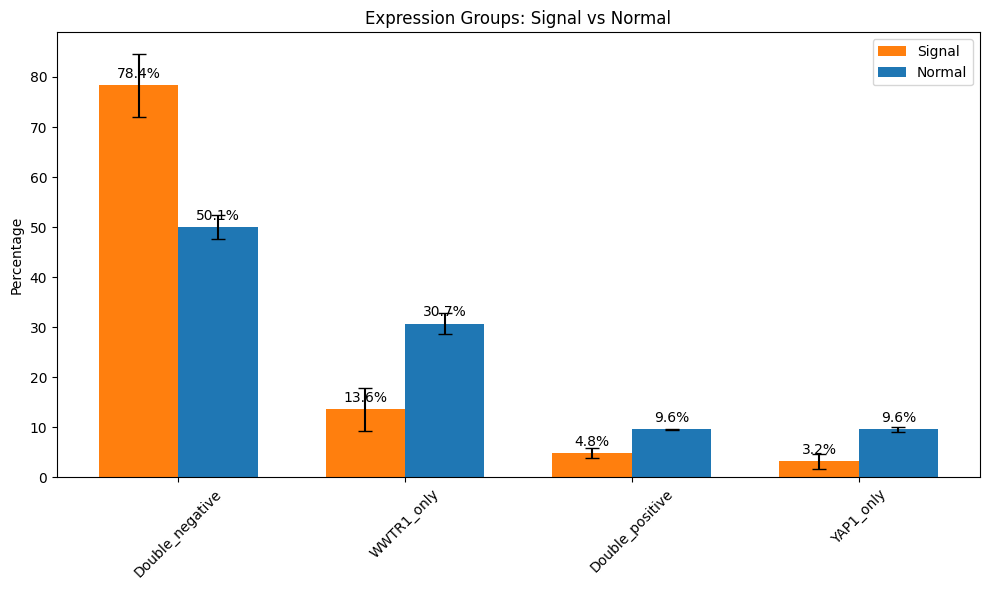

In [5]:
# Define the data
categories = ['Double_negative', 'WWTR1_only', 'Double_positive', 'YAP1_only']

# Signal values and their standard errors
signal_values = [
    [65.755627, 84.109555, 85.230790],  # Double_negative
    [22.125663, 9.654429, 9.052762],    # WWTR1_only
    [6.217954, 5.328582, 2.847905],     # Double_positive
    [5.900756, 0.907433, 2.868542]      # YAP1_only
]

# Normal values and their standard errors
normal_values = [
    [46.289228, 46.240203, 56.247917, 51.477273],  # Double_negative
    [33.693808, 33.679305, 24.725092, 30.840909],  # WWTR1_only
    [9.386364, 9.530157, 9.764880, 9.711620],      # Double_positive
    [10.305344, 10.315611, 9.496834, 8.295455]     # YAP1_only
]

# Calculate means and standard errors
signal_means = [np.mean(vals) for vals in signal_values]
normal_means = [np.mean(vals) for vals in normal_values]
signal_sems = [stats.sem(vals) for vals in signal_values]
normal_sems = [stats.sem(vals) for vals in normal_values]

# Create the plot
x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, signal_means, width, yerr=signal_sems, label='Signal', 
                color='#ff7f0e', capsize=5)
rects2 = ax.bar(x + width/2, normal_means, width, yerr=normal_sems, label='Normal', 
                color='#1f77b4', capsize=5)

# Customize the plot
ax.set_ylabel('Percentage')
ax.set_title('Expression Groups: Signal vs Normal')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()

# Add value labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()